In [1]:
%cd '/mnt/c/Users/malin/Documents/Facultate/honours/UMCG/ICU_Augment_and_Detect'

/mnt/c/Users/malin/Documents/Facultate/honours/UMCG/ICU_Augment_and_Detect


In [2]:
import matplotlib.pyplot as plt
import cv2
import os
import sys
import numpy as np
import pickle
import csv
import seaborn as sn
import pandas as pd
import re
sys.path.append(os.getcwd())


In [3]:
save_path = 'categorization/model_saves/'

def load_histories(save_path):
    history = '/history.pickle'
    models = ["mouth", "face", "skin", "eyes", "stacked"]
    all_histories = {}
    for model in models:
        all_histories[model] = load_average(save_path, model)
    return all_histories


In [38]:
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))

def rename_keys(dictionary):
    new_dictionary = {}
    for key in dictionary:
        if hasNumbers(key):
            new_key = "_".join(key.split("_")[:-1])
            new_dictionary[new_key] = np.asarray(dictionary[key])
        else:
            new_dictionary[key] = np.asarray(dictionary[key])
    return new_dictionary

def load_average(save_path, model):
    path = save_path + str(model)
    files = os.listdir(path)
    i = 0
    sum_histories = {}
    for f in files:
        if "pickle" in f:
            hist_path = path + "/history_" + str(i+1) + ".pickle"
            if not os.path.isfile(hist_path):
                hist_path = path + "/history.pickle"
            hist_file = open(hist_path, "rb")
            history = pickle.load(hist_file)
            history = rename_keys(history)
            if i == 0:
                sum_histories = history
            else:
                for key in history:
                    sum_histories[key] += history[key]
            i += 1
    for key in sum_histories:
        if model == "eyes":
            print(sum_histories[key])
        sum_histories[key]= sum_histories[key]/i
        if model == "eyes":
            print(sum_histories[key])

    return sum_histories

In [48]:
def print_raw(all_histories):
    with open("data/exact_values.csv", "w") as data_file:
        writer = csv.writer(data_file, delimiter=',')
        header = ['Model', 'Training Accuracy', 'Training AUC', 'Validation Accuracy', 'Validation AUC']
        writer.writerow(header)
        for model in all_histories:
            final = len(all_histories[model]["accuracy"]) - 1
            row = [str(model), all_histories[model]["accuracy"][final], all_histories[model]["auc"][final], all_histories[model]["val_accuracy"][final], all_histories[model]["val_auc"][final]]
            writer.writerow(row)

def plot_confusion_matrix(all_histories):
    for model in all_histories:
        final = len(all_histories[model]["accuracy"]) - 1
        matrix = [[all_histories[model]["val_true_positives"][final], all_histories[model]["val_false_positives"][final]],
                    [all_histories[model]["val_false_negatives"][final], all_histories[model]["val_true_negatives"][final]]]
        # plt.matshow(matrix)
        df_cm = pd.DataFrame(matrix, index = ["Positives", "Negative"],
              columns = ["Positives", "Negative"])
        ax = plt.axes()
        sn.heatmap(df_cm, annot=True, ax=ax)
        ax.set_title('Confusion Matrix ' + str(model))
        ax.set_xlabel("Actual Values")
        ax.set_ylabel("Predicted Values")
        plt.savefig("data/plots/confusion_matrix_" + str(model) + ".png")
        plt.show()

def plot_all_auc_acc(all_histories):

    fig = plt.figure(figsize=(10,10))

    plt.subplot(2,2,1)
    for key in all_histories:
        plt.plot(all_histories[key]["accuracy"], label = str(key))
    plt.xlim((0,10))
    plt.xlabel('Training Epochs')
    plt.ylabel('Training Accuracy')
    plt.legend(bbox_to_anchor=(0.2, 1.02, 1.8, .102), loc='lower left',
            ncol=5, mode="expand", borderaxespad=0., title = "Model")

    plt.subplot(2,2,2)
    for key in all_histories:
        plt.plot(all_histories[key]["auc"], label = str(key))
    plt.xlim((0,10))
    plt.xlabel('Training Epochs')
    plt.ylabel('Training AUC')

    plt.subplot(2,2,3)
    for key in all_histories:
        plt.plot(all_histories[key]["val_accuracy"], label = str(key))
    plt.xlim((0,10))
    plt.xlabel('Training Epochs')
    plt.ylabel('Validation Accuracy')

    plt.subplot(2,2,4)
    for key in all_histories:
        plt.plot(all_histories[key]["val_auc"], label = str(key))
    plt.xlim((0,10))
    plt.xlabel('Training Epochs')
    plt.ylabel('Validation AUC')

    plt.savefig("data/plots/models_acc_auc.png")
    plt.show()


In [39]:
all_histories = load_histories(save_path)


[1.35489887 1.04484808 0.8148498  0.66088383 0.59594811 0.48194878
 0.45663912 0.46906815 0.42964139 0.36360058]
[0.67744944 0.52242404 0.4074249  0.33044191 0.29797406 0.24097439
 0.22831956 0.23453407 0.2148207  0.18180029]
[1.2645915 1.5719844 1.6225681 1.7042801 1.762646  1.7976654 1.8132296
 1.8599222 1.8287938 1.8677043]
[0.6322957  0.7859922  0.81128407 0.85214007 0.881323   0.8988327
 0.9066148  0.9299611  0.9143969  0.93385214]
[1.3247836 1.7044544 1.7890157 1.8575335 1.8950024 1.9202836 1.9342488
 1.9347683 1.9375511 1.9600158]
[0.6623918  0.8522272  0.8945078  0.9287667  0.9475012  0.9601418
 0.9671244  0.96738416 0.9687756  0.9800079 ]
[238. 116.  52.  78.  78.  58.  54.  48.  56.  38.]
[119.  58.  26.  39.  39.  29.  27.  24.  28.  19.]
[214. 250. 212. 280. 310. 308. 312. 330. 322. 324.]
[107. 125. 106. 140. 155. 154. 156. 165. 161. 162.]
[436. 558. 622. 596. 596. 616. 620. 626. 618. 636.]
[218. 279. 311. 298. 298. 308. 310. 313. 309. 318.]
[140. 104. 142.  74.  44.  46.  

In [51]:
print(all_histories["eyes"]["val_false_negatives"])
print(all_histories["eyes"]["false_negatives"])

[19. 19. 15.  5.  0.  0.  3.  4. 19.  0.]
[70. 52. 71. 37. 22. 23. 21. 12. 16. 15.]


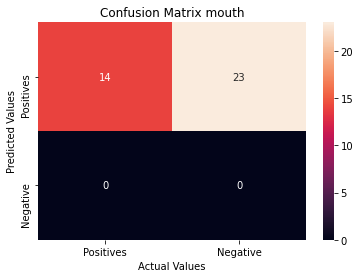

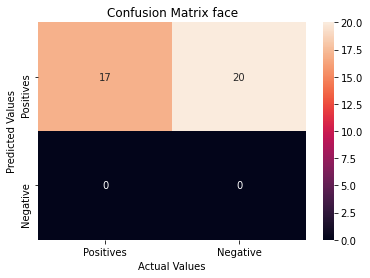

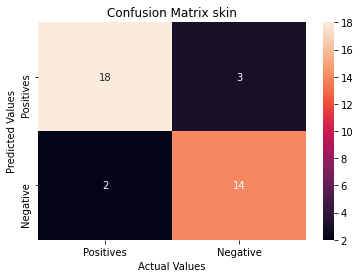

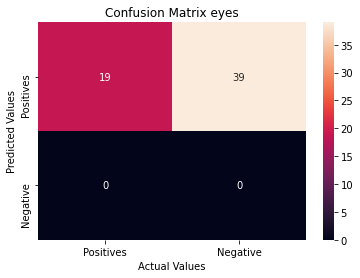

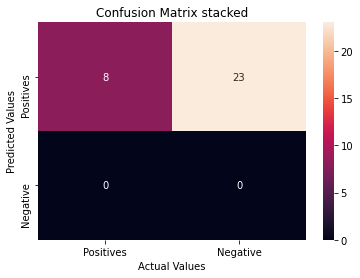

In [49]:
# plot_all_auc_acc(all_histories)
plot_confusion_matrix(all_histories)